### Mina Ilkhani

### student number : 610398191

**read first dataset**

In [1]:
import pandas as pd
first_df = pd.read_csv("./dataset/first_clustering_dataset.csv", header = None)
first_df.head()

,0,1
0,-0.125391,-1.268829
1,0.062522,1.278778
2,-0.048762,0.200549
3,0.105585,-0.496629
4,0.011886,-0.739317


In [2]:
first_df.shape

(400, 2)

we have 400 doc. each doc has 2 feature

In [3]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [4]:
# first_df.describe()  it's not meaningful
# first_df.corr()      it's not meaningful too

In [5]:
first_df.isnull().sum()

0    0
1    0
dtype: int64

there is no missing value

<AxesSubplot:xlabel='0', ylabel='1'>

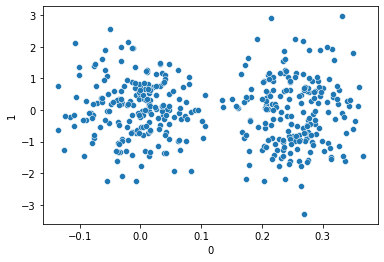

In [6]:
import seaborn as sns
sns.scatterplot(data=first_df, x=0, y=1)

2 clusters seem the best

defining a function to plot clusters

In [7]:
import matplotlib.pyplot as plt
def plot_clusters(data,x, y, s):
    plt.scatter(x, y, s=s, facecolors='none', edgecolors='r')
    sns.scatterplot(data=data, x=0, y=1)


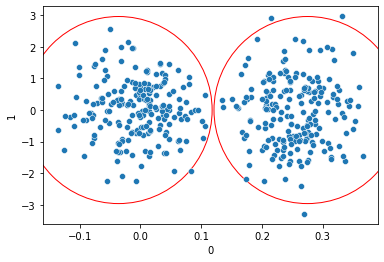

In [8]:
plot_clusters(first_df, [-0.036, 0.275], [0,0], 35000)

**read second dataset**

In [9]:
second_df = pd.read_csv("./dataset/second_clustering_dataset.csv",  header = None)
second_df.head()

,0,1
0,1.047961,0.357217
1,0.201221,0.295197
2,0.163506,-1.846756
3,0.876857,1.499314
4,1.389838,0.092843


In [10]:
second_df.shape

(450, 2)

we have 450 doc. each doc have 2 feature

In [11]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       450 non-null    float64
 1   1       450 non-null    float64
dtypes: float64(2)
memory usage: 7.2 KB


In [12]:
second_df.isnull().sum()

0    0
1    0
dtype: int64

there is no missing value

<AxesSubplot:xlabel='0', ylabel='1'>

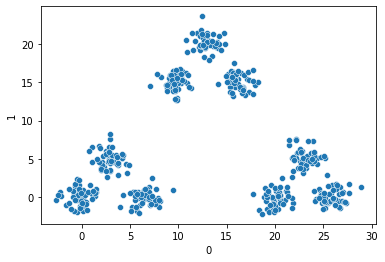

In [13]:
sns.scatterplot(data=second_df, x=0, y=1)

it can be 3 or 9 cluster. 9 seems better

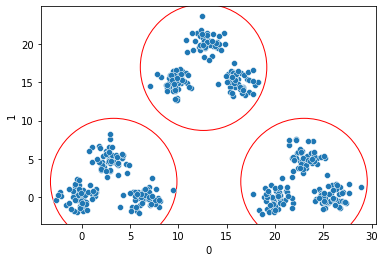

In [14]:
plot_clusters(second_df,[3.3,12.6, 23]
            ,[2,17, 2], 
            16000)

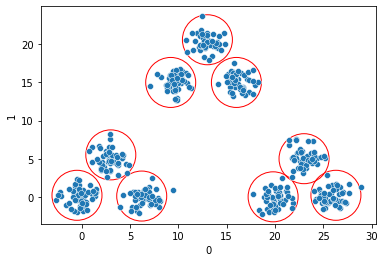

In [15]:
plot_clusters(second_df, [-0.5,3, 6.2,19.8, 23, 26.3, 9.2, 16, 13], 
            [0.2,5.5, 0.1, 0, 5, 0.2, 15, 15, 20.6], 
            s=2500)

**read third dataset**

In [16]:
third_df = pd.read_csv("./dataset/third_clustering_dataset.csv",  header = None)
third_df.head()

,0,1
0,0.315715,0.230080
1,-0.420268,0.609144
2,0.102944,-1.117928
3,-0.105657,-0.112488
4,-0.674778,0.130790


In [17]:
third_df.shape

(500, 2)

we have 500 doc. each doc have 2 feature

In [18]:
third_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [19]:
third_df.isnull().sum()

0    0
1    0
dtype: int64

there is no missing value

<AxesSubplot:xlabel='0', ylabel='1'>

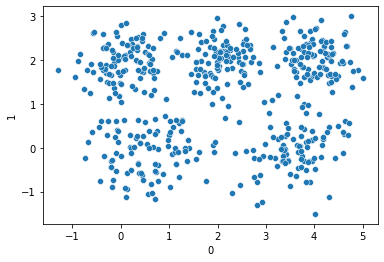

In [20]:
sns.scatterplot(data=third_df, x=0, y=1)


5 cluster seems the best

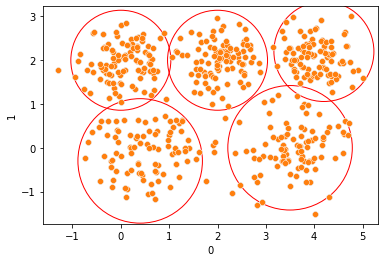

In [21]:
# plt.scatter(, facecolors='none', edgecolors='r')
# plt.scatter(, facecolors='none', edgecolors='r')
# sns.scatterplot(data=third_df, x=0, y=1)
plot_clusters(third_df, [0.4, 3.5], [-0.3, 0], 15500)
plot_clusters(third_df, [0, 2, 4.2], [2,2, 2.2], 10000)

**K-Means**

**elbow_polt**

In [22]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np

def elbow_polt(df):
    c = []
    K = range(1,16)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(df)
        c.append(kmeanModel.inertia_)
        
    plt.figure()
    plt.plot(K, c, 'bx-')
    plt.xlabel('k')
    plt.title('elbow Method showing the optimal k')
    plt.show()
    
    colors = kmeanModel.labels_
    print("Silhouette Score:", metrics.silhouette_score(np.array(df.values.tolist()), colors))


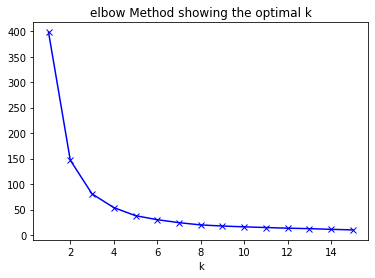

Silhouette Score: 0.4120474399997887


In [23]:
elbow_polt(first_df)

it is obvious that k must be 2(knee point)

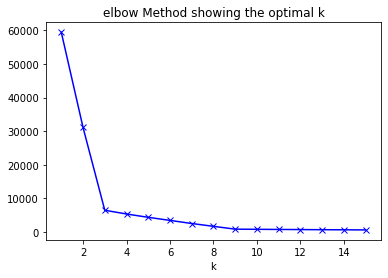

Silhouette Score: 0.4999320435110072


In [24]:
elbow_polt(second_df)

k can be 3. but if we want more accurate k must be 9

(two knees: 3 and 9)

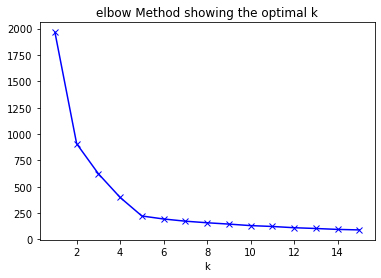

Silhouette Score: 0.3533463816607624


In [25]:
elbow_polt(third_df)

5 is knee point(k=5)

I gussed right about k in every data set.

first : k = 3

second : k = 3 or k = 9 (9 is better)

first : k = 5

In [26]:
def point_plot(n, df):
    kmeans = KMeans(n_clusters=n, init = 'random')
    kmeans.fit(df.values)
    y_kmeans = kmeans.predict(df.values)
    plt.scatter(df.values[:, 0], df.values[:, 1], c=y_kmeans, )

    centers = kmeans.cluster_centers_   #choose random centers
    plt.scatter(centers[:, 0], centers[:, 1])
    return kmeans

**Kmeans**

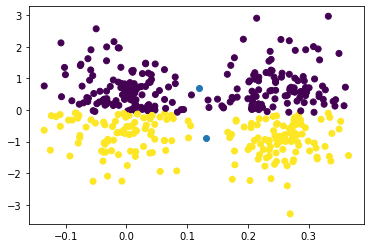

In [27]:
kmeans_first_df = point_plot(2, first_df)

KMeans can't cluster the first dataset well.

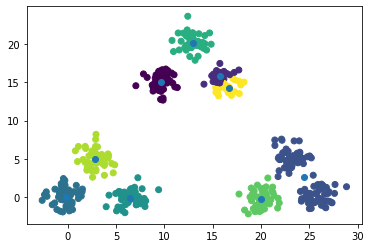

In [28]:
kmeans_second_df1 = point_plot(9, second_df)

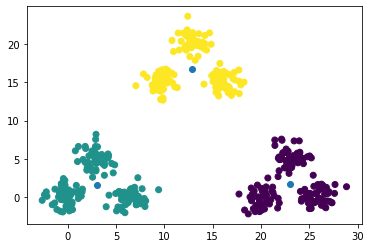

In [29]:
kmeans_second_df2 = point_plot(3, second_df)

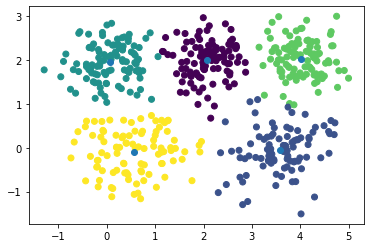

In [30]:
kmeans_third_df = point_plot(5, third_df)

**SEE:**

In [31]:
print("SSE:")
print("first(n=2):",int(kmeans_first_df.inertia_))
print("second(k=9):",int(kmeans_second_df1.inertia_))
print("second(k=3):",int(kmeans_second_df2.inertia_))
print("third(k=5):",int(kmeans_third_df.inertia_))

SSE:
first(n=2): 146
second(k=9): 1662
second(k=3): 6487
third(k=5): 222


**fuzzy-c-means**

* install fuzzy-c-means

* command: pip install fuzzy-c-means

In [32]:
# pip install fuzzy-c-means

In [33]:
from fcmeans import FCM
from matplotlib import pyplot as plt

In [34]:
def fuzzy_c_means(c,df, r):
    fcm = FCM(n_clusters=c)
    fcm.fit(df)
    fcm_centers = fcm.centers
    fcm_labels_soft = fcm.soft_predict(df)  # What percentage belongs
    fcm_labels = fcm.predict(df)
    multiple_clusters = []
    for i in range(df.shape[0]):
        count = 1
        for j in range(c-1):
            if  abs(fcm_labels_soft[i][j]) >r and (fcm_labels_soft[i][j+1]) > r :
                count += 1
        if (count > 2):
            multiple_clusters.append(df[i])
    print('number of points that belongs to more than one cluster:', len(multiple_clusters))
    f, axes = plt.subplots()
    axes.scatter(df[:,0], df[:,1], c=fcm_labels)
    axes.scatter(fcm_centers[:,0], fcm_centers[:,1],)
    for i in range (len(multiple_clusters)):
        axes.scatter(multiple_clusters[i][0], multiple_clusters[i][1], c = 'pink')
    
    plt.show()
    print("Silhouette Score:" ,metrics.silhouette_score(np.array(df.tolist()), fcm_labels))
    
    

number of points that belongs to more than one cluster: 0


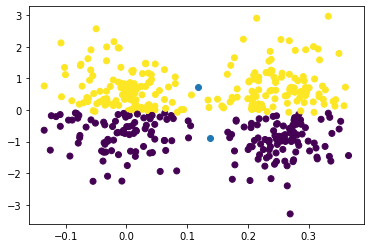

Silhouette Score: 0.5362906097948957


In [35]:
fcm_first_df = fuzzy_c_means(2, first_df.values, 0.001)

number of points that belongs to more than one cluster: 3


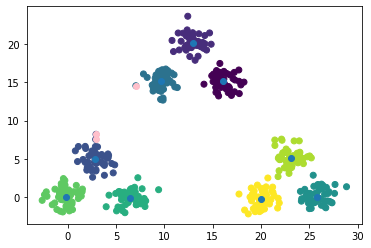

Silhouette Score: 0.6925519321164127


In [36]:
fuzzy_c_means(9, second_df.values, 0.04)

number of points that belongs to more than one cluster: 65


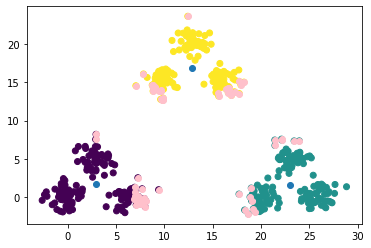

Silhouette Score: 0.7240379233766401


In [37]:
fuzzy_c_means(3, second_df.values, 0.05)

number of points that belongs to more than one cluster: 138


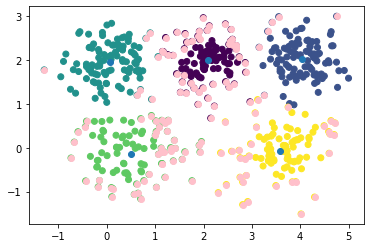

Silhouette Score: 0.5605130818892635


In [38]:
fuzzy_c_means(5, third_df.values,0.04)

**dbscan**

In [39]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [40]:
def dbscan(df, eps = .5, min_samples = 5):
    db = DBSCAN( eps=eps, min_samples=min_samples)
    db.fit(df)
    y_pred = db.fit_predict(df)
    plt.scatter(df[:,0], df[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    
    labels = db.labels_
    print("Silhouette Score:",  metrics.silhouette_score(np.array(df.tolist()), labels))
    

Silhouette Score: 0.29704819936730514


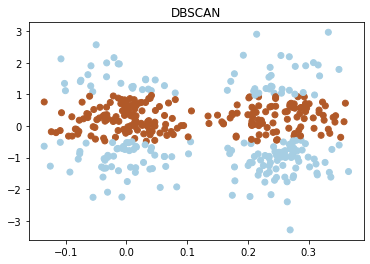

In [41]:
dbscan(first_df.values,.5, 150 )

Silhouette Score: 0.4929345546315373


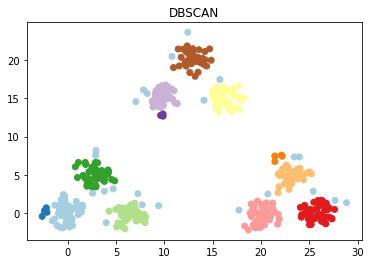

In [42]:
dbscan(second_df.values, 0.8, 3)

Silhouette Score: 0.48676875511699347


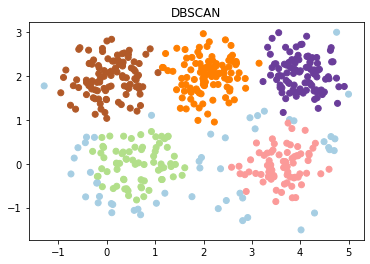

In [43]:
dbscan(third_df.values, 0.5, 22)

Silhouette Score for comparing:
| Data set | K-Means  | Fuzzy C-Means    | DBSCAN   |
|---|:-------------|:-----------|:------|
| first | 0.40435  | 0.53629       | 0.29704   |
| second | 0.47784  | 0.64855    |  0.49293   |
| third |  0.35639 | 0.56051    |  0.486768   |

**Fuzzy C-Means** seems better for all data sets